In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_sales = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Product%20Sales%20Data.csv")

In [3]:
df_sales

,Month,Cream,Detergent,Moisturizer,Sanitizer,Shampoo,Soap,Total Units,Total Profit
0,Jan,5100,9600,1525,1550,1200,2510,21485,211500
1,Feb,5000,6500,1225,1250,2100,2640,18715,183800
2,Mar,4450,9950,1365,1390,3550,2150,22855,225200
3,Apr,5770,9270,1155,1180,1870,3410,22655,223200
4,May,4460,8160,1765,1790,1560,3610,21345,210100
5,Jun,4790,7890,1580,1605,1890,2770,20525,201900
6,Jul,4680,9380,1145,1170,1780,2990,21145,296000
7,Aug,5760,10360,1425,1450,2860,3710,25565,361900
8,Sep,6000,8500,1805,1830,2100,3550,23785,234500
9,Oct,8200,10700,1915,1940,2300,2000,27055,267200


In [4]:
df_long = pd.melt(df_sales,
                  id_vars = 'Month', 
                  value_vars = ['Cream', 'Detergent', 'Moisturizer', 'Sanitizer', 'Shampoo', 'Soap'],
                  value_name = 'Sales',
                  ignore_index =  ['Total Units', 'Total Profit'])

In [5]:
df_long

,Month,variable,Sales
0,Jan,Cream,5100
1,Feb,Cream,5000
2,Mar,Cream,4450
3,Apr,Cream,5770
4,May,Cream,4460
...,...,...,...
67,Aug,Soap,3710
68,Sep,Soap,3550
69,Oct,Soap,2000
70,Nov,Soap,2350


In [6]:
pivot_table = pd.pivot_table(df_long,
                             values=['Sales'],
                             index=['variable'],
                             aggfunc={'Sales': 'sum'}) 

In [7]:
pivot_table

,Sales
variable,
Cream,68710
Detergent,118810
Moisturizer,18815
Sanitizer,19115
Shampoo,25410
Soap,34600


In [8]:
#Построим столбчатую диаграмму. На диаграмме наглядно видно продажи общие продажи продуктов за все указанные месяцы. 
#По диаграмме можно сделать выводы о том, какие продукты являются наиболее популярными и продаваемыми. 

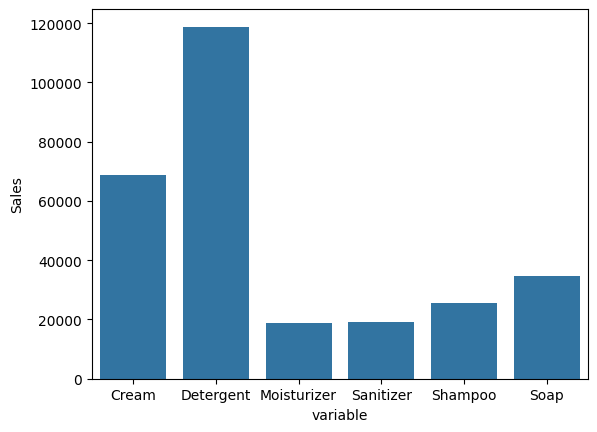

In [9]:
sns.barplot(data = pivot_table, x = 'variable', y = 'Sales')
plt.show()

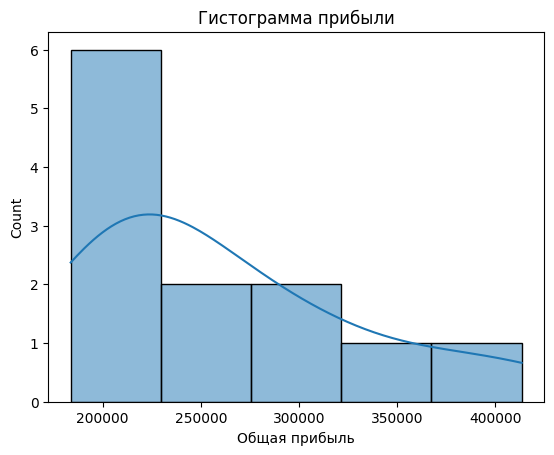

In [11]:
# Создание гистограммы для колонки 'Total Profit'. Показывает распределение прибыли.
sns.histplot(df_sales['Total Profit'], kde=True)
plt.title('Гистограмма прибыли')
plt.xlabel('Общая прибыль')
plt.show() 

In [ ]:
#Точечный график показывает  взаимосвязи между двумя переменными — между прибылью и продажами.

<Axes: xlabel='Total Units', ylabel='Total Profit'>

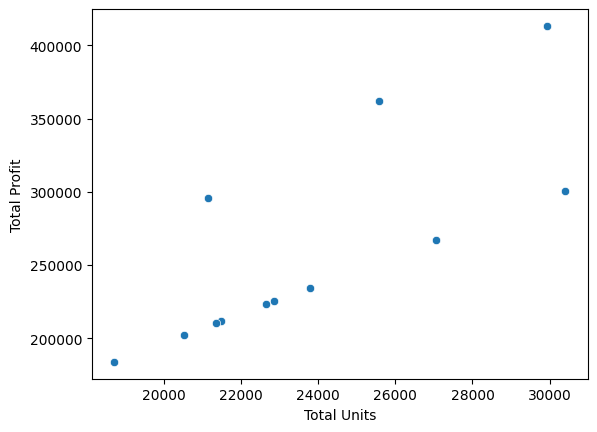

In [21]:
sns.scatterplot(data = df_sales, x = 'Total Units', y = 'Total Profit')

In [142]:
df1 = df_long.pivot_table(values=['Sales'], index=['variable'], columns='Month', aggfunc='sum')

In [144]:
df1

Sales                                                           \
Month         Apr    Aug    Dec   Feb   Jan   Jul   Jun   Mar   May    Nov   
variable                                                                     
Cream        5770   5760   7300  5000  5100  4680  4790  4450  4460   7200   
Detergent    9270  10360  14800  6500  9600  9380  7890  9950  8160  13700   
Moisturizer  1155   1425   1785  1225  1525  1145  1580  1365  1765   2125   
Sanitizer    1180   1450   1810  1250  1550  1170  1605  1390  1790   2150   
Shampoo      1870   2860   1800  2100  1200  1780  1890  3550  1560   2400   
Soap         3410   3710   2910  2640  2510  2990  2770  2150  3610   2350   

                          
Month          Oct   Sep  
variable                  
Cream         8200  6000  
Detergent    10700  8500  
Moisturizer   1915  1805  
Sanitizer     1940  1830  
Shampoo       2300  2100  
Soap          2000  3550

In [ ]:
#Тепловая карта наглядно показывает прибыль от продажи продуктов за все указанные месяцы.

<Axes: xlabel='None-Month', ylabel='variable'>

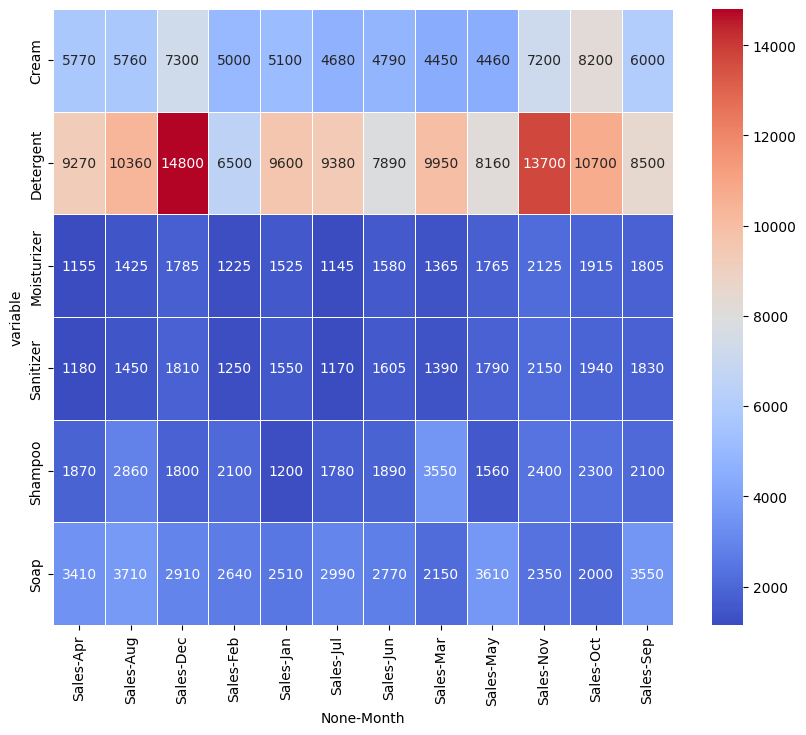

In [146]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)